In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [6]:
def compute_svd(matrix):
  
  U, S, V_T = np.linalg.svd(matrix, full_matrices=False)
  
  return U, S, V_T

In [7]:
#Question 1
matrix = np.array([[7, 1], [0, 0], [5, 5]])
U, S, VT = compute_svd(matrix)
S = np.diag(S)
print(np.matrix.round(S,2))
print(U)

[[9.49 0.  ]
 [0.   3.16]]
[[-0.70710678  0.70710678]
 [ 0.          0.        ]
 [-0.70710678 -0.70710678]]


In [33]:
def convertColorToGrayScale(image, ratio_for_grayscale):

    img_gray = np.zeros((image.shape[0], image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            img_gray[i][j] = np.dot(image[i][j], ratio_for_grayscale)
    
    return img_gray

In [34]:
#Question 2
color_image = cv2.imread("./dataset/cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
print(np.sum(gray_image))

6014684.911


In [35]:
def computeDotProduct(vector1, vector2):
  result = vector1.dot(vector2)
  return result

In [36]:
def compute_cosine(v1, v2):
  dot_product = computeDotProduct(v1, v2)
  norm_v1 = np.linalg.norm(v1)
  norm_v2 = np.linalg.norm(v2)
  result = dot_product / (norm_v1 * norm_v2)
  return result

In [37]:
def compute_cosine_similarity(matrix1, matrix2):
  v1 = matrix1.flatten()
  v2 = matrix2.flatten()
  
  return compute_cosine(v1,v2)

In [38]:
def computeVectorLength(vector):
  len_of_vector = np.linalg.norm(vector)
  return len_of_vector

In [39]:
#Question 3
A = np.array([[1,2,2],
               [3,2,2],
               [-2,1,-3]])
B = np.array([[4,2,4],
               [2,-2,5],
               [3,4,-4]])
result = compute_cosine_similarity(A,B)
print(round(result,2))

0.57


In [40]:
def compute_rms_error(matrix1, matrix2):
  return np.sqrt(np.mean((matrix1 - matrix2)**2))

In [41]:
#Question 4
A = np.array([[1,2,2],
               [3,2,2],
               [-2,1,-3]])
B = np.array([[4,2,4],
               [2,-2,5],
               [3,4,-4]])
result = compute_rms_error(A,B)
print(round(result,2))

2.87


In [42]:
def evaluate_svd_for_feature_compression_by_metric(gray_image, metric):
  U,S,V_T = compute_svd(gray_image)
  k = len(S)
  S = np.diag(S)

  approx_list = []
  u_list = []
  metric_list = []

  for i in range(1,k+1,1):
    approx = None
    if i == 1:
      approx = np.dot(U[:,0].reshape(-1,1), np.dot(S[0,0], V_T[0,:].reshape(1,-1)))
    else:
      approx = np.dot(U[:,0:i], np.dot(S[0:i,0:i], V_T[0:i,:]))
    
    approx_list.append(approx)
    if metric == 0:
      metric_list.append(compute_cosine_similarity(gray_image, approx))
    else:
      metric_list.append(compute_rms_error(gray_image, approx))

  return metric_list, approx_list, k


def draw_metric_information(metric_list, k):
  x_axis = list(range(1,k+1,1))
  plt.xlabel("k")
  plt.ylabel("RMS error")
  plt.plot(x_axis,metric_list, color="r")
  plt.show()

def draw_approx_image(approx_list, k):
  row = 6
  col = 4
  fig = plt.figure(figsize=(25, 25))

  fig_index = 1

  for i in range(0, k, 13):
      # Adds a subplot at the 1st position
      fig.add_subplot(row, col, fig_index)
      # showing image
      plt.imshow(approx_list[i], cmap="gray")

      plt.axis('off')
      plt.title("k =" + str(i+1))
      fig_index = fig_index + 1

  plt.show()



300


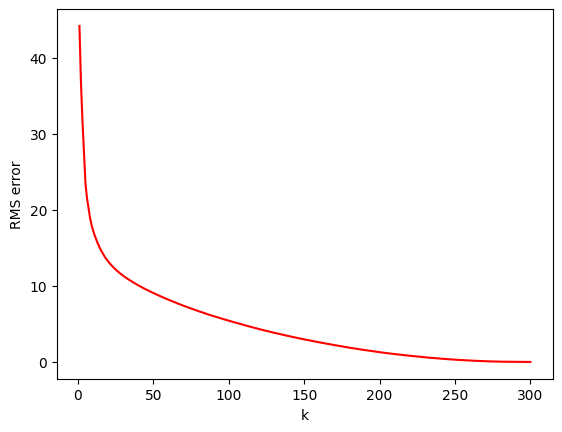

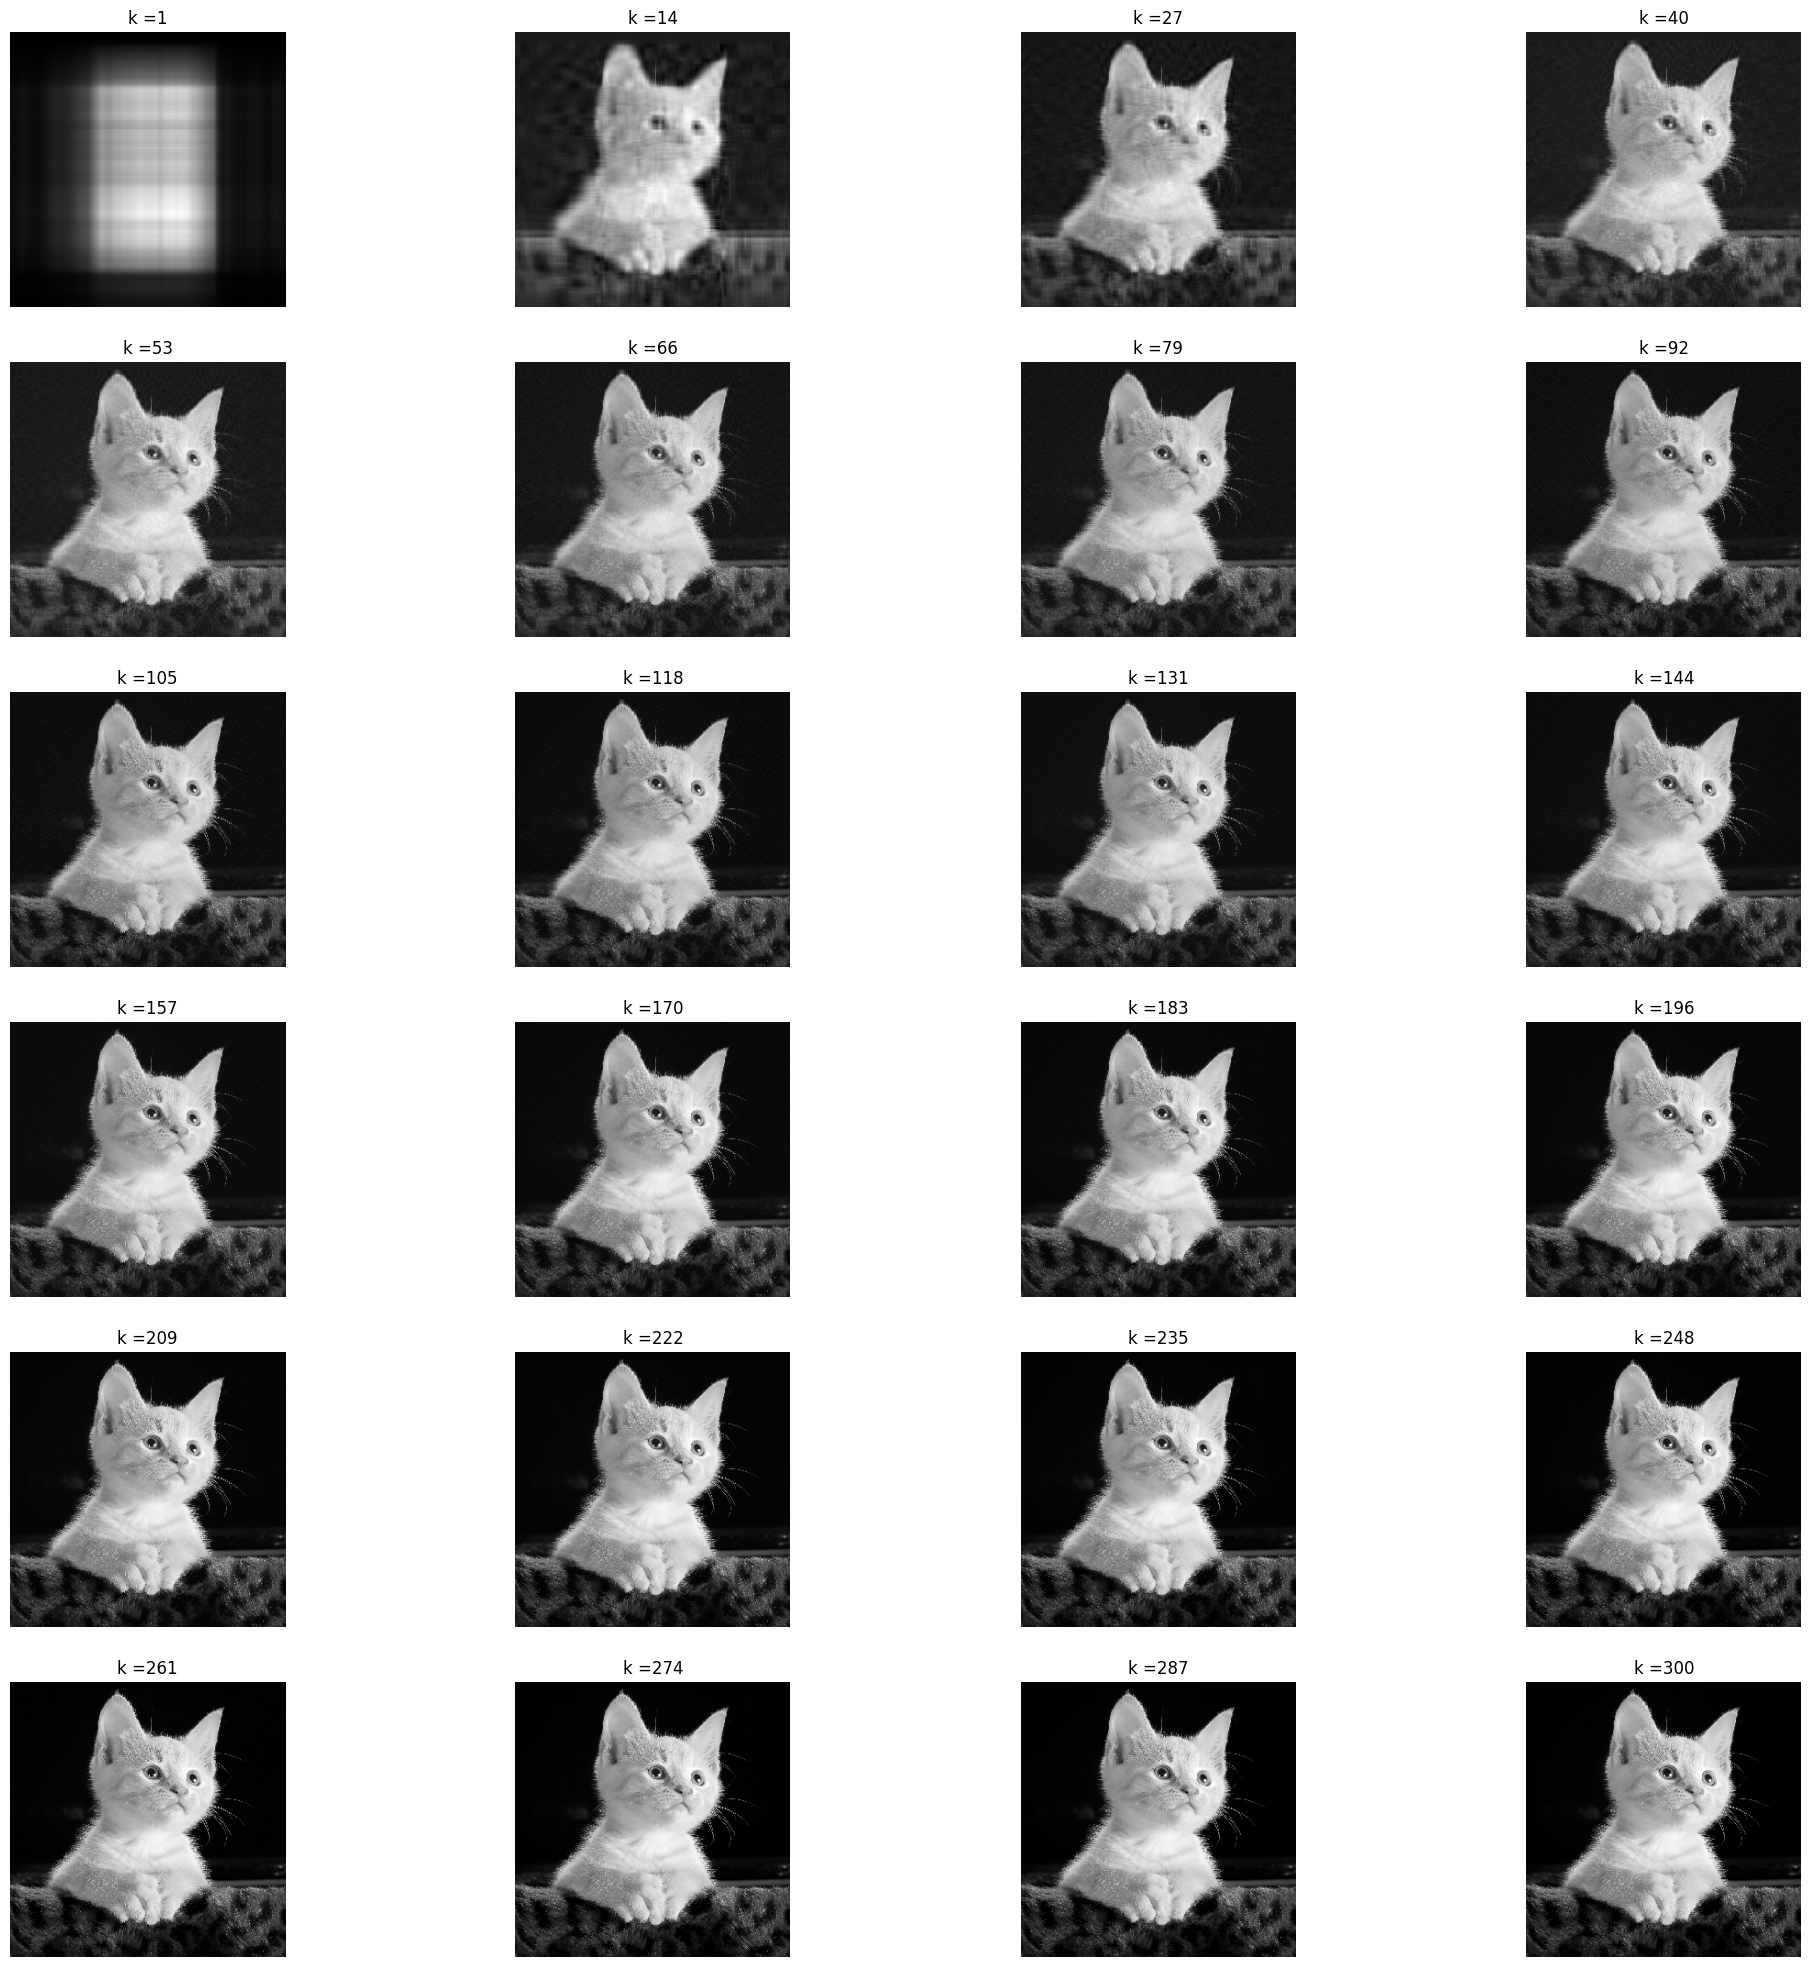

In [44]:
def main_application():
  color_image = cv2.imread("./dataset/cat.jpeg")
  color_image = cv2.resize(color_image, (300,300))
  ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
  gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
  metric_list, approx_list, k = evaluate_svd_for_feature_compression_by_metric(gray_image, 1)
  print(len(approx_list))
  draw_metric_information(metric_list, k)
  draw_approx_image(approx_list, k)

main_application()

### Question 5

In [45]:
#Question 5
color_image = cv2.imread("./dataset/cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
_, _, k  = evaluate_svd_for_feature_compression_by_metric(gray_image,0)
print(k)

300


In [57]:
# Add Gaussian noise to input image
def addNoiseToImage(image, mean = 0, stddev= 25):

  #uncomment the following three lines of codes for another project
  # noise = np.random.normal(mean, stddev, image.shape)
  # noise = np.where(noise > 0 , np.around(noise), 0)
  # noise = noise.astype(np.uint8)
  # np.save("./dataset/noise.npy", noise)

  noise = np.load("./dataset/noise.npy")
  # Add noise to image
  noisy_img = image + noise
  noisy_img = np.where(noisy_img > 255, 255, noisy_img)
  noisy_img = noisy_img.astype(np.uint8)
  return noisy_img

#### Question 7


In [58]:

color_image = cv2.imread("./dataset/cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)

noise_image = addNoiseToImage(gray_image)
avg_org = np.sum(gray_image)/(gray_image.shape[0]*gray_image.shape[1])
avg_noise = np.sum(noise_image)/(gray_image.shape[0]*gray_image.shape[1])

print("avg_org: ", round(avg_org,2))
print("avg_noise: ", round(avg_noise,2))



avg_org:  66.83
avg_noise:  76.13


In [59]:
def perform_image_denoise(noise_image, sigma_threshold):

  # Calculate U (u), Σ (s) and V (vh)
  u, s, vh = compute_svd(noise_image)

  # Remove sigma values below sigma_threshold
  s_cleaned = np.where(s < sigma_threshold, 0, s)

  img_denoised = np.dot(u, np.dot(np.diag(s_cleaned), vh))

  return img_denoised


In [60]:
def find_best_sigma_image_denoise(noise_image, orignial_image, metric = 0, sigma_range = 1000):

  # Calculate U (u), Σ (s) and V (vh)
  u, s, vh = compute_svd(noise_image)

  # Select the best threshold that has mininum RMS error
  evaluation_history = []
  for i in range(1, sigma_range):
    s_cleaned = np.where(s < i, 0, s) 

    img_denoised = np.dot(u, np.dot(np.diag(s_cleaned), vh))

    if (metric == 0):
      similarity = compute_cosine_similarity(orignial_image, img_denoised)
      evaluation_history.append(similarity)
    else:
      error = compute_rms_error(orignial_image, img_denoised)
      evaluation_history.append(error)

  if metric == 0:
    best_index = np.argmax(evaluation_history)
  else:
    best_index = np.argmin(evaluation_history)

  return best_index, evaluation_history


#### Question *8*

similarity 16.83


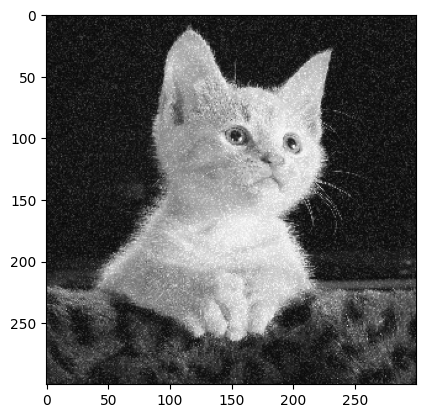

In [63]:
#Read an colori mage
color_image = cv2.imread("./dataset/cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
noise_gray_image = addNoiseToImage(gray_image, 0, 25)

#Perform image denois
sigma_threshold = 200
denoise_image = perform_image_denoise(noise_gray_image, sigma_threshold)
plt.imshow(denoise_image, cmap="gray")
similarity = compute_rms_error(denoise_image,gray_image)
print("similarity",  round(similarity,2))

#### Question *9*

similarity 0.9899


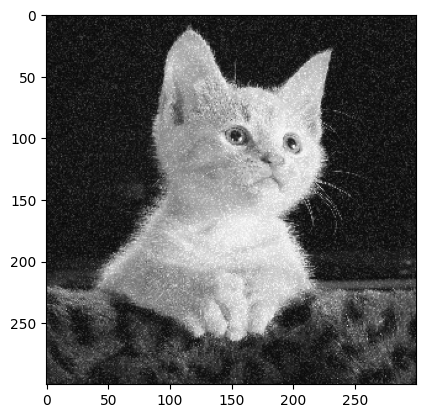

In [66]:
#Read an colori mage
color_image = cv2.imread("./dataset/cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
noise_gray_image = addNoiseToImage(gray_image, 0, 25)

#Perform image denois
sigma_threshold = 200
denoise_image = perform_image_denoise(noise_gray_image, sigma_threshold)
plt.imshow(denoise_image, cmap='gray')
similarity = compute_cosine_similarity(denoise_image,gray_image)
print("similarity",  round(similarity,4))

### Question 10

In [68]:
def find_best_sigma_based_cosine():
  #Read an colori mage
  color_image = cv2.imread("./dataset/cat.jpeg")

  #Resize an image to (300,300)
  color_image = cv2.resize(color_image, (300,300))

  #Convert image to grayscale
  ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
  gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)

  #Save resized grayscale image to file gray_image.png
  cv2.imwrite("./gray_image.png", gray_image)

  # Add Gaussian noise to gray image
  noise_gray_image = addNoiseToImage(gray_image, 0, 25)

  #Save noisy grayscale image to file noise_gray_image.png
  cv2.imwrite("./noise_gray_image.png", noise_gray_image)

  metric = 1 # for RMSE
  best_threshold, evaluation_history = find_best_sigma_image_denoise(noise_gray_image, gray_image, metric)
  print("best sigma: ", best_threshold)

find_best_sigma_based_cosine()

best sigma:  523


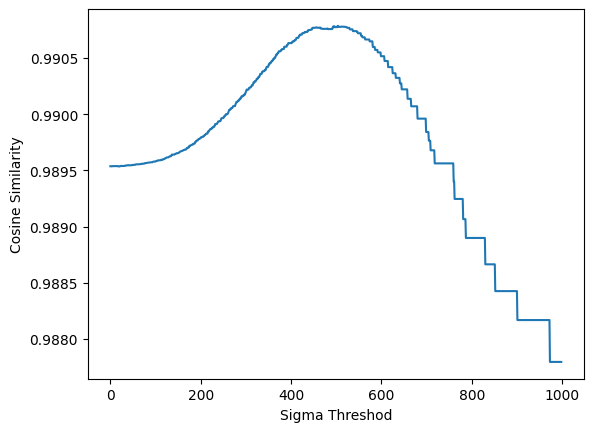

In [ ]:
def plot_chart_based_cosine():
  #Read an colori mage
  color_image = cv2.imread("/content/cat.jpeg")

  #Resize an image to (300,300)
  color_image = cv2.resize(color_image, (300,300))

  #Convert image to grayscale
  ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
  gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)

  #Save resized grayscale image to file gray_image.png
  cv2.imwrite("gray_image.png", gray_image)

  # Add Gaussian noise to gray image
  noise_gray_image = addNoiseToImage(gray_image, 0, 25)

  #Save noisy grayscale image to file noise_gray_image.png
  cv2.imwrite("noise_gray_image.png", noise_gray_image)

  metric = 0 # for cosine similarity
  best_threshold, evaluation_history = find_best_sigma_image_denoise(noise_gray_image, gray_image, metric)

  plt.plot(evaluation_history)
  plt.xlabel("Sigma Threshod")
  plt.ylabel("Cosine Similarity")
  plt.show()

plot_chart_based_cosine()

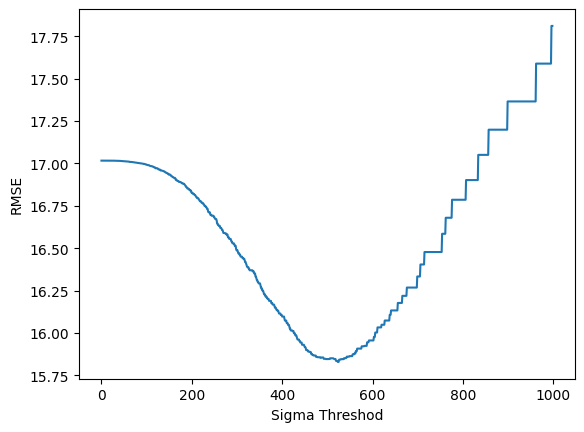

In [69]:
def plot_chart_based_rmse():
  #Read an colori mage
  color_image = cv2.imread("./dataset/cat.jpeg")

  #Resize an image to (300,300)
  color_image = cv2.resize(color_image, (300,300))

  #Convert image to grayscale
  ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
  gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)

  #Save resized grayscale image to file gray_image.png
  cv2.imwrite("./gray_image.png", gray_image)

  # Add Gaussian noise to gray image
  noise_gray_image = addNoiseToImage(gray_image, 0, 25)

  #Save noisy grayscale image to file noise_gray_image.png
  cv2.imwrite("./noise_gray_image.png", noise_gray_image)

  metric = 1 # for cosine similarity
  best_threshold, evaluation_history = find_best_sigma_image_denoise(noise_gray_image, gray_image, metric)

  plt.plot(evaluation_history)
  plt.xlabel("Sigma Threshod")
  plt.ylabel("RMSE")
  plt.show()

plot_chart_based_rmse()